# Randomized Digital Nets Demo

In [1]:

import qmcpy as qp
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
seed = 5
genseed = 1234568

### Getting started

Here is an unshifted, unscrambled net

In [3]:
dnet = qp.DigitalNetB2(randomize=False,dimension = 5)
print(dnet)
x = dnet.gen_samples(8,warn=False)
print(x)

DigitalNetB2 (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       0
    graycode        0
    entropy         129631274736245415304383935233602856024
    spawn_key       ()
[[0.    0.    0.    0.    0.   ]
 [0.5   0.5   0.5   0.5   0.5  ]
 [0.25  0.75  0.75  0.75  0.25 ]
 [0.75  0.25  0.25  0.25  0.75 ]
 [0.125 0.625 0.375 0.125 0.125]
 [0.625 0.125 0.875 0.625 0.625]
 [0.375 0.375 0.625 0.875 0.375]
 [0.875 0.875 0.125 0.375 0.875]]


Here is an unscrambled net with a digital shift

In [4]:
dnet = qp.DigitalNetB2(randomize='DS',dimension = 5)
print(dnet)
x = dnet.gen_samples(8,warn=False)
print(x)
print(dnet.m_max)

DigitalNetB2 (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       DS
    graycode        0
    entropy         188416310994346559452077292888261028959
    spawn_key       ()
[[0.32017314 0.43449706 0.16756982 0.88430993 0.12036882]
 [0.82017314 0.93449706 0.66756982 0.38430993 0.62036882]
 [0.07017314 0.68449706 0.91756982 0.13430993 0.37036882]
 [0.57017314 0.18449706 0.41756982 0.63430993 0.87036882]
 [0.44517314 0.80949706 0.29256982 0.75930993 0.24536882]
 [0.94517314 0.30949706 0.79256982 0.25930993 0.74536882]
 [0.19517314 0.05949706 0.54256982 0.00930993 0.49536882]
 [0.69517314 0.55949706 0.04256982 0.50930993 0.99536882]]
32


Here is a digital net with totally random generator matrices and no digital shift

In [5]:
dnet = qp.DigitalNetB2(generating_matrices=genseed,seed=seed,dimension = 5,randomize=False)
print(dnet)
x = dnet.gen_samples(8,warn=False)
print(x)

DigitalNetB2 (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       0
    graycode        0
    entropy         5
    spawn_key       ()
[[0.       0.       0.       0.       0.      ]
 [0.1875   0.40625  0.09375  0.78125  0.375   ]
 [0.828125 0.859375 0.625    0.875    0.703125]
 [0.890625 0.703125 0.71875  0.15625  0.828125]
 [0.78125  0.046875 0.953125 0.953125 0.4375  ]
 [0.96875  0.390625 0.921875 0.234375 0.0625  ]
 [0.109375 0.8125   0.328125 0.078125 0.765625]
 [0.171875 0.71875  0.296875 0.859375 0.640625]]


Here is a digital net with totally random generator matrices and a digital shift

In [6]:
dnet = qp.DigitalNetB2(generating_matrices= genseed,seed=seed,dimension = 5,randomize='DS')
print(dnet)
x = dnet.gen_samples(8,warn=False)
print(x)

DigitalNetB2 (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       DS
    graycode        0
    entropy         5
    spawn_key       ()
[[0.54361632 0.28284881 0.03484717 0.72945266 0.54469248]
 [0.73111632 0.12659881 0.06609717 0.44820266 0.91969248]
 [0.37174132 0.57972381 0.65984717 0.35445266 0.24781748]
 [0.43424132 0.98597381 0.69109717 0.57320266 0.37281748]
 [0.26236632 0.26722381 0.98797217 0.30757766 0.98219248]
 [0.44986632 0.17347381 0.89422217 0.52632766 0.60719248]
 [0.59049132 0.59534881 0.36297217 0.68257766 0.31031748]
 [0.65299132 0.93909881 0.26922217 0.40132766 0.18531748]]


In [7]:
dnetcomp = qp.DigitalNetB2(dimension=5,seed=seed)
dnetcomp.gen_samples(8)

array([[0.40903903, 0.52081583, 0.34458808, 0.0379708 , 0.63803439],
       [0.78181288, 0.35844894, 0.55126612, 0.99863014, 0.27763404],
       [0.24451157, 0.22277571, 0.93884728, 0.54375734, 0.78881561],
       [0.6173461 , 0.90455178, 0.14626132, 0.48898147, 0.17838952],
       [0.30872313, 0.41829054, 0.03693177, 0.23779469, 0.53426219],
       [0.93594844, 0.70902195, 0.86080111, 0.79294307, 0.42383329],
       [0.09825122, 0.84092602, 0.62931795, 0.74383204, 0.88471231],
       [0.72541561, 0.03835378, 0.45391566, 0.28304357, 0.02431869]])

### Comparison between randomized digital net and default digital net 

In [8]:
dnet2 = qp.DigitalNetB2(dimension = 2, generating_matrices= genseed, seed = seed)
dnetcomp2 = qp.DigitalNetB2(dimension = 2, seed = seed)

Randomized = dnet2.gen_samples(64)
Default = dnetcomp2.gen_samples(64)

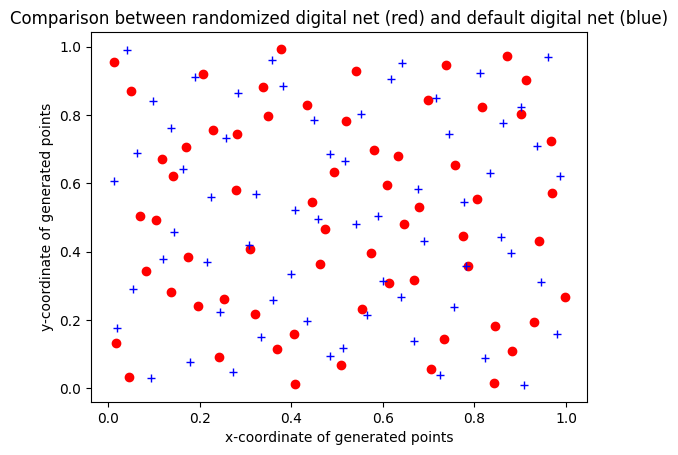

In [9]:
plt.plot(Randomized[:,0],Randomized[:,1],'ro',Default[:,0],Default[:,1],'b+')
plt.xlabel("x-coordinate of generated points")
plt.ylabel("y-coordinate of generated points")
plt.title("Comparison between randomized digital net (red) and default digital net (blue)")
plt.show()

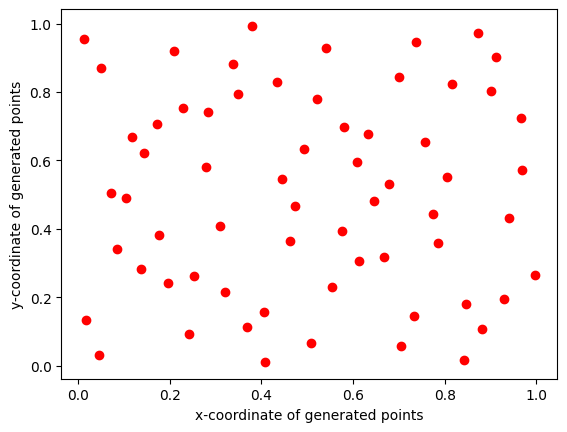

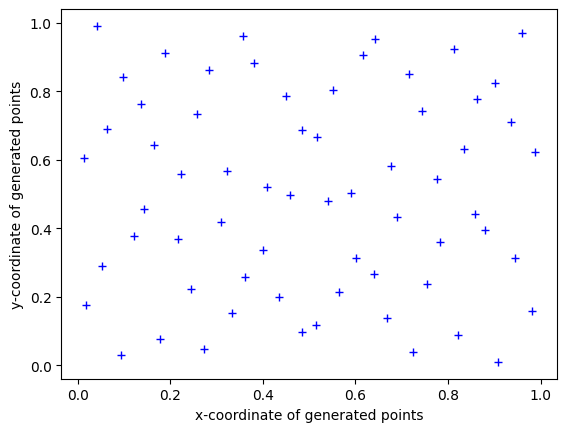

In [10]:
plt.plot(Randomized[:,0],Randomized[:,1],'ro')
plt.xlabel("x-coordinate of generated points")
plt.ylabel("y-coordinate of generated points")
plt.show()
plt.plot(Default[:,0],Default[:,1],'b+')
plt.xlabel("x-coordinate of generated points")
plt.ylabel("y-coordinate of generated points")
plt.show()

### Bitwize representation of generating matrices

In [ ]:
from qmcpy.discrete_distribution.digital_net_b2 import DigitalNetB2
from numpy import *
small_sobol = array([[4,2,1],[4,6,5]],dtype=uint64)
small_sobol_file = 'small_sobol.2.3.3.msb.npy'
big_sobol_file = 'sobol_mat.21201.32.32.lsb.npy'
save(small_sobol_file,small_sobol)
dnet = DigitalNetB2(
    dimension = [0,1],
    randomize = 'LMS', # LMS_NO_SHIFT
    graycode = True,
    seed = 7,
    generating_matrices = small_sobol_file,
    t_lms = 64,
    _verbose = True)
# dnet = DigitalNetB2(
#     seed=123,
#     generating_matrices=675234567,
#     dimension= 2
# )
x = dnet.gen_samples(
    n_min = 0,
    n_max = 2**3,
    warn = True,
    return_unrandomized = False)
print("\n\nz")
for j in range(dnet.d):
    dim = dnet.dvec[j]
    print('\n\tz_og[dvec[%d]] = %s\n\t\t'%(j,dnet.z_og[j]),end='',flush=True)
    for t in range(dnet.t_max):
        mask = array(1<<(dnet.t_max-t-1), dtype=uint64)
        for m in range(dnet.m_max):
            bit = (mask & dnet.z_og[dim,m])>0
            print("%-2d"%bit,end='',flush=True)
        print("\n\t\t",end='',flush=True)
print("\n\nznew",end='',flush=True)
for j in range(dnet.d):
    print('\n\tz[dvec[%d]] = %s\n\t\t'%(j,dnet.z[j]),end='',flush=True)
    for t in range(dnet.t_lms):
        mask = array(1<<(dnet.t_lms-t-1), dtype=uint64)
        for m in range(dnet.m_max):
            bit = (mask & dnet.z[j,m])>0
            print("%-2d"%bit,end='',flush=True)
        print("\n\t\t",end='',flush=True)
print("\nx\n\t",end='',flush=True)
for i in range(len(x)):
    for j in range(dnet.d):
        print("%-7.3f"%x[i,j],end='',flush=True)
    print("\n\t",end='',flush=True)
print()
import os; os.remove(small_sobol_file)

s (scrambling_matrix)

	s[dvec[0]]
		1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		1 0 1 0 0 0 0 1 0 1 0 1 1

/Users/zhangbocheng/QMCSoftware/qmcpy/discrete_distribution/digital_net_b2/digital_net_b2.py:307


0 0 0 0 0 0 0 0 
		0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
		0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 
		0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 
		0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 
		0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 
		0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 
		0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
		0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 
		0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 
		0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

## Integration

### Sample Integration  

In [11]:
d = 2
tol = 1e-3
dnet = qp.DigitalNetB2(dimension = d, generating_matrices= genseed)
print(dnet.m_max)
gaussian_net = qp.Gaussian(dnet,mean = 0, covariance=1/2)
dnetcomp = qp.DigitalNetB2(d)
gaussian_net_comp = qp.Gaussian(dnetcomp,mean = 0,covariance = 1/2)


20


In [12]:
solution_random,data_random = qp.CubQMCNetG(qp.Keister(gaussian_net),abs_tol = tol).integrate()
solution_default,data_default = qp.CubQMCNetG(qp.Keister(gaussian_net_comp),abs_tol= tol).integrate()
print("Integration data from a randomized digital net")
print(data_random)
print("\nIntegration data from the default digital net")
print(data_default)


Integration data from a randomized digital net
LDTransformData (AccumulateData Object)
    solution        1.820
    comb_bound_low  1.820
    comb_bound_high 1.821
    comb_flags      1
    n_total         2^(12)
    n               2^(12)
    time_integrate  0.023
CubQMCNetG (StoppingCriterion Object)
    abs_tol         0.001
    rel_tol         0
    n_init          2^(10)
    n_max           2^(35)
Keister (Integrand Object)
Gaussian (TrueMeasure Object)
    mean            0
    covariance      2^(-1)
    decomp_type     PCA
    transform       Gaussian (TrueMeasure Object)
                       mean            0
                       covariance      2^(-1)
                       decomp_type     PCA
DigitalNetB2 (DiscreteDistribution Object)
    d               2^(1)
    dvec            [0 1]
    randomize       1
    graycode        0
    entropy         15742654432924664150616644726150028085
    spawn_key       ()

Integration data from the default digital net
LDTransformData

In [13]:
answer = qp.Keister(dnet).exact_integ(2)
print(f"Difference between randomized digital net results and exact answer {0}".format(abs(answer-solution_random)))
print(f"Difference between default digital net results and exact answer {0}".format(abs(answer-solution_default)))

Difference between randomized digital net results and exact answer 0
Difference between default digital net results and exact answer 0


### Error comparison between mean of means and median of means

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


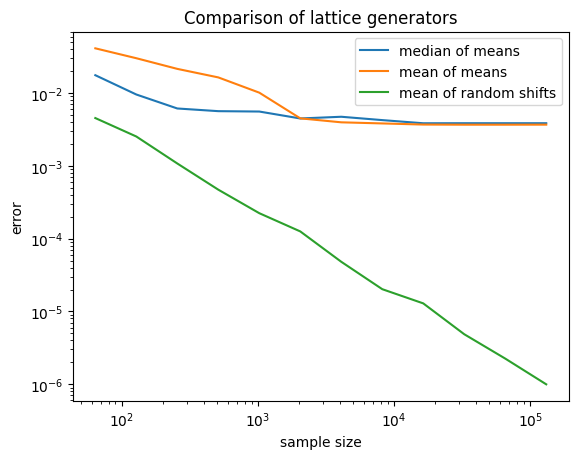

In [14]:
#mean of means vs. median of means

d = 2
N_min = 6
N_max = 18
N_list = 2**np.arange(N_min,N_max)
r = 11
num_trials = 25


error_median = np.zeros(N_max - N_min) 
error_mean = np.zeros(N_max - N_min) 
error_mean_onegen = np.zeros(N_max - N_min) 
for i in range(num_trials):
    y_median = []
    y_mean = []
    y_mean_one_gen = []
    print(i)
    list_of_keister_objects_random = []
    list_of_keister_objects_default = []
    y_randomized_list = []
    y_default_list = []
    for k in range(r):
        dnet = qp.DigitalNetB2(generating_matrices = genseed,dimension=d)
        keister = qp.Keister(dnet)
        list_of_keister_objects_random.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)
        y_randomized_list.append(y)
        keister = qp.Keister(qp.DigitalNetB2(d))
        list_of_keister_objects_default.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)    
        y_default_list.append(y) 
            
    for N in N_list:

        y_median.append(np.median([np.mean(y[:N]) for y in y_randomized_list]))
        y_mean_one_gen.append(np.mean([np.mean(y[:N]) for y in y_default_list]))
        y_mean.append(np.mean([np.mean(y[:N]) for y in y_randomized_list]))

    answer = keister.exact_integ(d)
    error_median += abs(answer-y_median)
    error_mean += abs(answer-y_mean)
    error_mean_onegen += abs(answer-y_mean_one_gen)

error_median /= num_trials
error_mean /= num_trials
error_mean_onegen /= num_trials

plt.loglog(N_list,error_median,label = "median of means")
plt.loglog(N_list,error_mean,label = "mean of means")
plt.loglog(N_list,error_mean_onegen,label = "mean of random shifts")
plt.xlabel("sample size")
plt.ylabel("error")
plt.title("Comparison of lattice generators")
plt.legend()
plt.savefig("./meanvsmedian.png")



## Exploration

In [19]:
import numpy as np

t1 =5 
t_max = 16

u = np.random.randint(low=0, high=1<<t1, size=1, dtype='uint64')
u <<= (t_max-t1)

In [23]:
u

array([53248], dtype=uint64)

In [25]:
bin(53248)

'0b1101000000000000'